In [81]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [82]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [83]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [84]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [85]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               7168      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])

In [87]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/60
6/6 [==============================] - 0s 21ms/step - loss: 331.2343 - mae: 15.2704 - val_loss: 52.0964 - val_mae: 6.0881
Epoch 2/60
6/6 [==============================] - 0s 5ms/step - loss: 42.8990 - mae: 4.6351 - val_loss: 28.1668 - val_mae: 3.9141
Epoch 3/60
6/6 [==============================] - 0s 5ms/step - loss: 33.4235 - mae: 3.6690 - val_loss: 18.4241 - val_mae: 3.4532
Epoch 4/60
6/6 [==============================] - 0s 5ms/step - loss: 24.8613 - mae: 3.3407 - val_loss: 19.7064 - val_mae: 3.5895
Epoch 5/60
6/6 [==============================] - 0s 5ms/step - loss: 24.3223 - mae: 3.5846 - val_loss: 22.2627 - val_mae: 3.7781
Epoch 6/60
6/6 [==============================] - 0s 5ms/step - loss: 21.1011 - mae: 3.2592 - val_loss: 16.8785 - val_mae: 3.1402
Epoch 7/60
6/6 [==============================] - 0s 5ms/step - loss: 16.7621 - mae: 2.7674 - val_loss: 12.2638 - val_mae: 2.7192
Epoch 8/60
6/6 [==============================] - 0s 5ms/step - loss: 15.9415 - mae: 2.

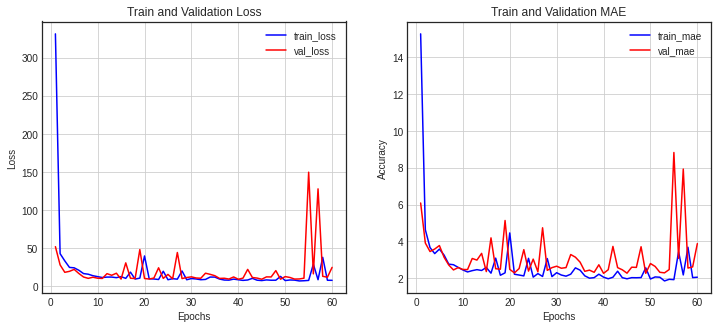

In [88]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [89]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 28.5168 - mae: 3.9710


[28.516754150390625, 3.970963478088379]

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [102]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=0)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(train_labels))
print(len(set(train_labels)))

6736
2246
2246
6736
46


In [103]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [104]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

In [105]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 1.5595 - accuracy: 0.6458 - val_loss: 1.3246 - val_accuracy: 0.7458
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 0.9789 - accuracy: 0.7724 - val_loss: 0.9529 - val_accuracy: 0.7939
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7347 - accuracy: 0.8233 - val_loss: 0.9069 - val_accuracy: 0.8068
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.5857 - accuracy: 0.8621 - val_loss: 0.8964 - val_accuracy: 0.8134
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.4938 - accuracy: 0.8800 - val_loss: 0.9352 - val_accuracy: 0.8188
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.4217 - accuracy: 0.8946 - val_loss: 0.9174 - val_accuracy: 0.8250
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.3568 - accuracy: 0.9106 - val_loss: 0.9615 - val_accuracy: 0.8219
Epoch 

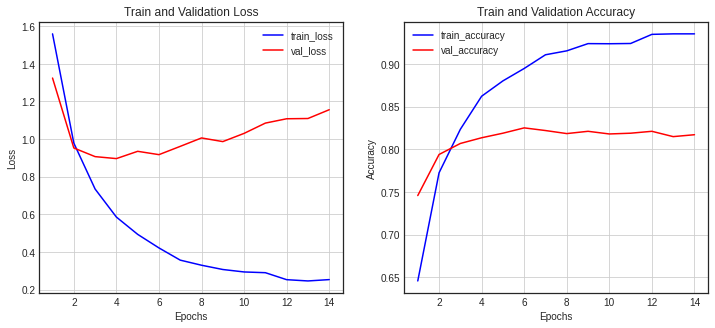

In [108]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [109]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9179 - accuracy: 0.7992


[0.917890727519989, 0.799198567867279]

In [110]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [119]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=0)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [120]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

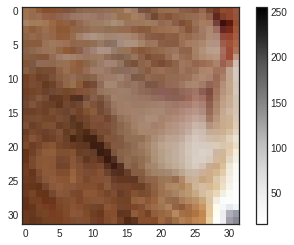

In [121]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [122]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [178]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [179]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = layers.Input(shape=(3072, ))
hidden1 = layers.Dense(2048, activation='relu')(inputs)
bn1 = layers.BatchNormalization()(hidden1)
activation_1 = layers.Dense(2048)(bn1)
drop_out_1 = layers.Dropout(0.5)(activation_1)
hidden2 = layers.Dense(1024, activation='relu')(drop_out_1)
bn2 = layers.BatchNormalization()(hidden2)
activation_2 = layers.Dense(1024)(bn2)
drop_out_2 = layers.Dropout(0.5)(activation_2)
hidden3 = layers.Dense(512, activation='relu')(drop_out_2)
bn3 = layers.BatchNormalization()(hidden3)
activation_3 = layers.Dense(512)(bn3)
drop_out_3 = layers.Dropout(0.5)(activation_3)
outputs = layers.Dense(512, activation='relu')(drop_out_3)
outputs = layers.Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
dense_120 (Dense)            (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_49 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_121 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dropout_47 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_122 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_50 (Batc (None, 1024)              409

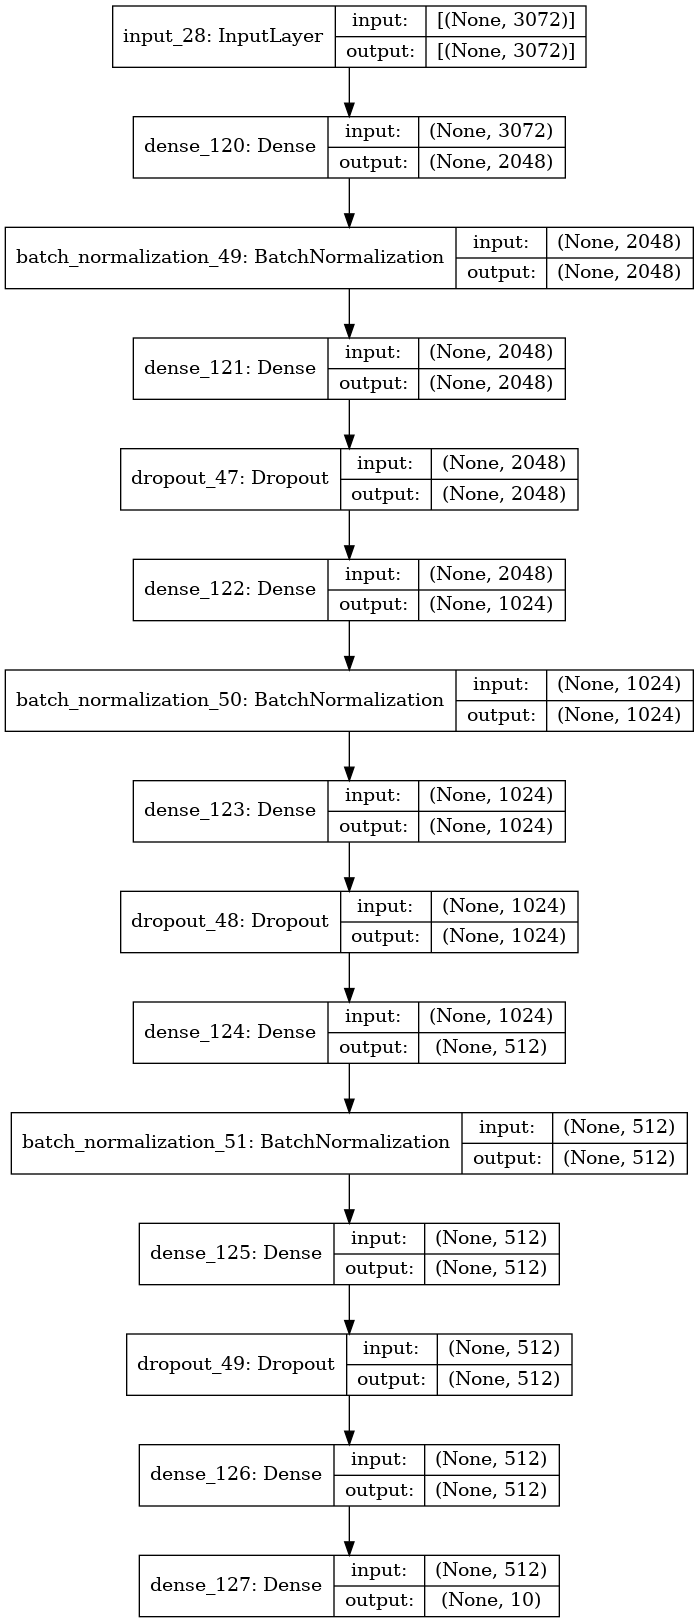

In [180]:
utils.plot_model(model, show_shapes=True)

In [181]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [186]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar_10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3047 - accuracy: 0.0984 - val_loss: 2.3036 - val_accuracy: 0.1016
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3047 - accuracy: 0.1010 - val_loss: 2.3037 - val_accuracy: 0.1040
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3043 - accuracy: 0.0976 - val_loss: 2.3037 - val_accuracy: 0.1040
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3043 - accuracy: 0.1011 - val_loss: 2.3041 - val_accuracy: 0.0989
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3041 - accuracy: 0.1004 - val_loss: 2.3041 - val_accuracy: 0.1004
Epoch 6/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3048 - accuracy: 0.0981 - val_loss: 2.3032 - val_accuracy: 0.1040
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3045 - accuracy: 0.0980 - val_loss: 2.3034 - val_accuracy:

In [187]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

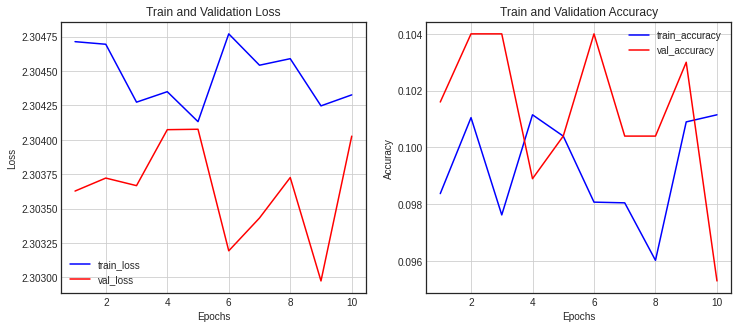

In [188]:
show_history(history)

In [189]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1000


[2.303910493850708, 0.10000000149011612]